In [1]:
import pandas as pd
file_path = "C:/Users/abdul/Downloads/Reviews.csv"
data = pd.read_csv(file_path)
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [2]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [3]:
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [10]:
from wordcloud import WordCloud

In [11]:
combined_text = " ".join(data['Review'].astype(str))

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

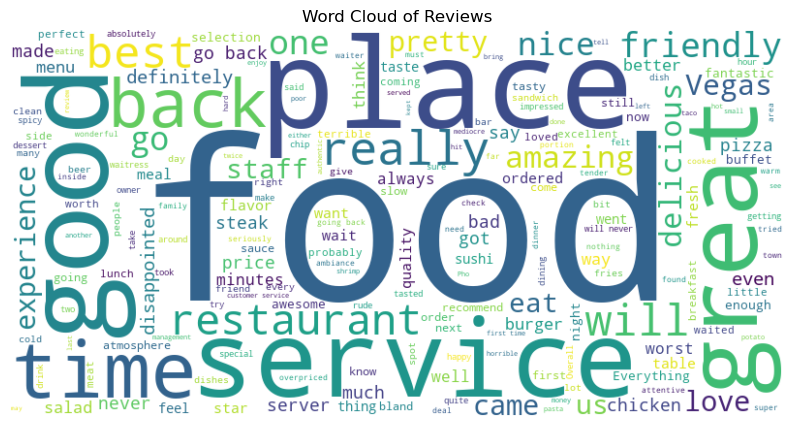

In [13]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [14]:
from collections import Counter

In [15]:
targeted_words=['good','great','amazing','bad','not bad']
all_words=" ".join(data['Review']).lower().split() 

In [16]:
word_counts=Counter(all_words)

In [17]:
target_word_count={word:word_counts[word] for word in targeted_words}

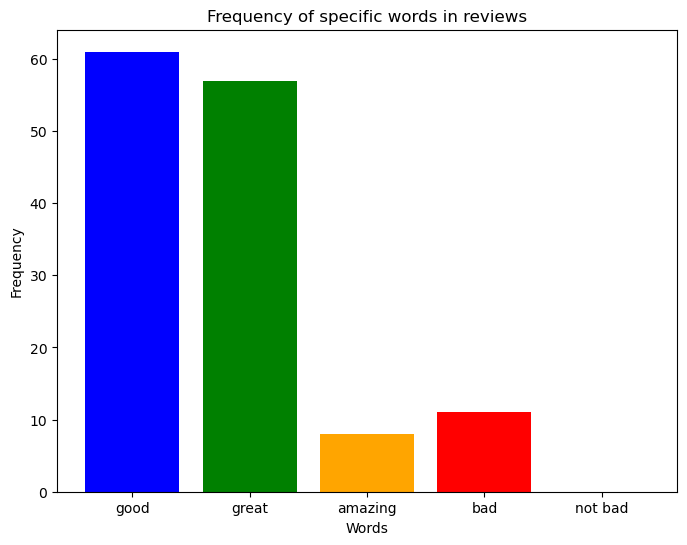

In [18]:
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(),target_word_count.values(),color=['blue','green','orange','red','black'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [19]:
#Text preprocessing

In [20]:
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [21]:
#tokenaization
from nltk.tokenize import word_tokenize

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [26]:
from nltk.corpus import stopwords

In [27]:
from nltk.tokenize import word_tokenize

In [28]:
import nltk

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [31]:
#stemming

In [32]:
from nltk.stem import PorterStemmer

In [33]:
Stemmer = PorterStemmer()

In [34]:
data['stemmed'] = data['Review'].apply(lambda x: " ".join([Stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [35]:
data['stemmed'].value_counts()

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [36]:
#Lemmatization

In [37]:
import nltk

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
from nltk.corpus import wordnet

In [41]:
lemmatizer = WordNetLemmatizer()

In [42]:
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: Lemmatized, Length: 1000, dtype: object


In [43]:
#Remove numbers

In [44]:
import re

In [45]:
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+',' ',x))
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [46]:
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]',' ',x))
print(data['cleaned_text'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [48]:
#Normalization

In [49]:
!pip install contractions

In [50]:
import contractions

In [51]:
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [52]:
!pip install emoji

In [53]:
import emoji

In [54]:
data['Emoji'] = data['Review'].apply(emoji.demojize)
print(data['Emoji'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [55]:
#Removinh HTML tags

In [56]:
!pip install beautifulsoup4

In [57]:
from bs4 import BeautifulSoup

In [58]:
data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['Cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Cleaned, Length: 1000, dtype: object


C:\Users\abdul\AppData\Local\Temp\ipykernel_21500\1340314868.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())


In [59]:
#TF - IDF VECTORIZER
#TF = Term Frequency , IDF = Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])

In [61]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
#Building Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [63]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [65]:
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [66]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [67]:
y_pred = model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [69]:
print(f'Accuracy: {accuracy}')
print (f'Classification Report:')
print(report)

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [70]:
import re
import string
from bs4 import BeautifulSoup
import contractions
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Assuming you have imported your vectorizer and model correctly
# Example:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression

# Initialize vectorizer and model here if not already done

def preprocess_review(review):
    review = review.lower()
    review = BeautifulSoup(review, "html.parser").get_text()
    review = re.sub(f"[{string.punctuation}]", " ", review)
    review = contractions.fix(review)
    review = emoji.demojize(review)
    tokens = word_tokenize(review)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    cleaned_review = ' '.join(lemmatized_tokens)
    return cleaned_review

# Example usage to predict sentiment based on the preprocessed review
if __name__ == "__main__":
    new_review = input("Enter a review: ")
    cleaned_review = preprocess_review(new_review)
    
    # Assuming you have initialized or imported vectorizer and model
    # vectorizer = TfidfVectorizer(...)
    # model = LogisticRegression(...)
    
    # Example vectorization and prediction
    new_review_vectorized = vectorizer.transform([cleaned_review])
    prediction = model.predict(new_review_vectorized)
    
    if prediction[0] == 1:
        print("The review is predicted positive.")
    else:
        print("The review is predicted negative.")


Enter a review:  Biryani is good but chicken is bad


The review is predicted negative.
